In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("../data/raw/household_power_consumption.txt", sep=';', na_values=['?'], low_memory=False)

# DateTime index creation (as done previously)
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.set_index('datetime', inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Convert all data to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Interpolate missing values
df.interpolate(method="linear", inplace=True)

df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [12]:
# Resample to hourly averages
df_hourly = df.resample('H').mean()

df_hourly.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [13]:
# Lag features (Capturing past values)
for lag in [1, 2, 3, 24, 48, 168]:  # previous hour(s) and previous days/weeks
    df_hourly[f'lag_{lag}'] = df_hourly['Global_active_power'].shift(lag)

df_hourly.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,lag_1,lag_2,lag_3,lag_24,lag_48,lag_168
datetime,,,,,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,4.222889,NaN,NaN,NaN,NaN,NaN
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,3.632200,4.222889,NaN,NaN,NaN,NaN
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,3.400233,3.632200,4.222889,NaN,NaN,NaN
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,3.268567,3.400233,3.632200,NaN,NaN,NaN


In [14]:
# Rolling Window Statistics (Capturing recent trends)
df_hourly['rolling_mean_24hr'] = df_hourly['Global_active_power'].rolling(window=24).mean()
df_hourly['rolling_std_24hr'] = df_hourly['Global_active_power'].rolling(window=24).std()

df_hourly.head(30)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,lag_1,lag_2,lag_3,lag_24,lag_48,lag_168,rolling_mean_24hr,rolling_std_24hr
datetime,,,,,,,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.000000,0.527778,16.861111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.000000,6.716667,16.866667,4.222889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.000000,1.433333,16.683333,3.632200,4.222889,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.000000,0.000000,16.783333,3.400233,3.632200,4.222889,NaN,NaN,NaN,NaN,NaN
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.000000,0.416667,17.216667,3.268567,3.400233,3.632200,NaN,NaN,NaN,NaN,NaN
2006-12-16 22:00:00,2.200133,0.056167,238.760000,9.523333,0.000000,0.133333,4.433333,3.056467,3.268567,3.400233,NaN,NaN,NaN,NaN,NaN
2006-12-16 23:00:00,2.061600,0.071433,240.619667,8.896667,0.000000,0.083333,0.000000,2.200133,3.056467,3.268567,NaN,NaN,NaN,NaN,NaN
2006-12-17 00:00:00,1.882467,0.102433,240.961833,8.126667,0.000000,0.466667,0.000000,2.061600,2.200133,3.056467,NaN,NaN,NaN,NaN,NaN
2006-12-17 01:00:00,3.349400,0.136933,240.448333,14.246667,0.000000,25.233333,0.000000,1.882467,2.061600,2.200133,NaN,NaN,NaN,NaN,NaN


In [15]:
# Time-based Features (Capturing temporal patterns)
df_hourly['hour'] = df_hourly.index.hour
df_hourly['dayofweek'] = df_hourly.index.dayofweek
df_hourly['month'] = df_hourly.index.month

df_hourly.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,lag_1,lag_2,lag_3,lag_24,lag_48,lag_168,rolling_mean_24hr,rolling_std_24hr,hour,dayofweek,month
datetime,,,,,,,,,,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,5,12
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,4.222889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,5,12
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,3.632200,4.222889,NaN,NaN,NaN,NaN,NaN,NaN,19,5,12
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,3.400233,3.632200,4.222889,NaN,NaN,NaN,NaN,NaN,20,5,12
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,3.268567,3.400233,3.632200,NaN,NaN,NaN,NaN,NaN,21,5,12


In [16]:
df_hourly.dropna(inplace=True)
df_hourly.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,lag_1,lag_2,lag_3,lag_24,lag_48,lag_168,rolling_mean_24hr,rolling_std_24hr,hour,dayofweek,month
datetime,,,,,,,,,,,,,,,,,,
2006-12-23 17:00:00,5.452533,0.215967,233.644167,23.360000,16.183333,0.666667,16.750000,4.349100,4.049100,3.757967,1.496800,1.752633,4.222889,3.099713,1.066674,17,5,12
2006-12-23 18:00:00,3.879400,0.099767,238.000500,16.363333,0.000000,0.016667,17.350000,5.452533,4.349100,4.049100,2.686967,2.443300,3.632200,3.149397,1.074356,18,5,12
2006-12-23 19:00:00,4.117833,0.205333,238.729333,17.300000,0.000000,0.600000,17.466667,3.879400,5.452533,4.349100,3.938167,2.197133,3.400233,3.156883,1.080699,19,5,12
2006-12-23 20:00:00,4.181400,0.124767,238.518833,17.596667,0.000000,0.350000,17.416667,4.117833,3.879400,5.452533,3.536067,2.437367,3.268567,3.183772,1.098426,20,5,12
2006-12-23 21:00:00,3.288433,0.235767,238.594667,13.893333,0.000000,0.216667,5.666667,4.181400,4.117833,3.879400,4.548667,0.982267,3.056467,3.131263,1.059784,21,5,12


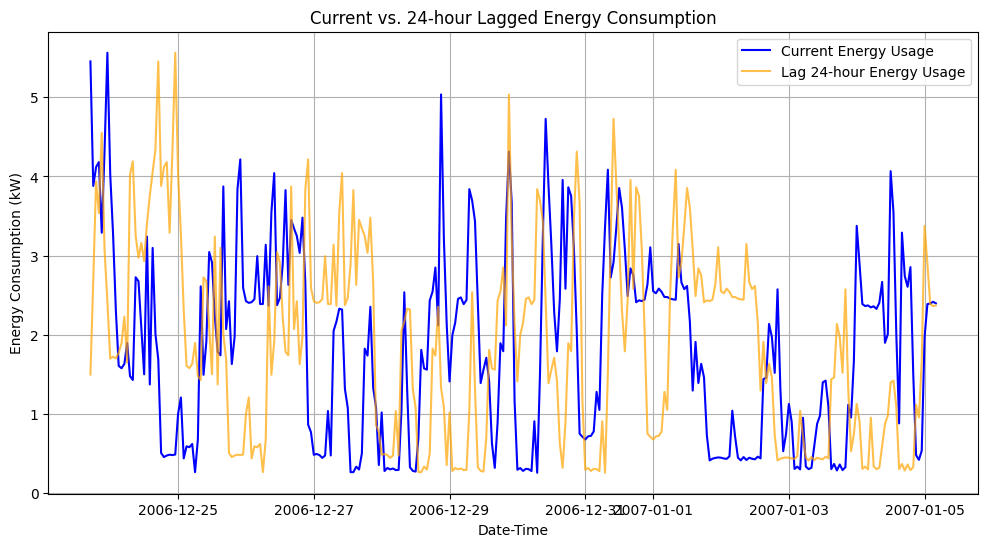

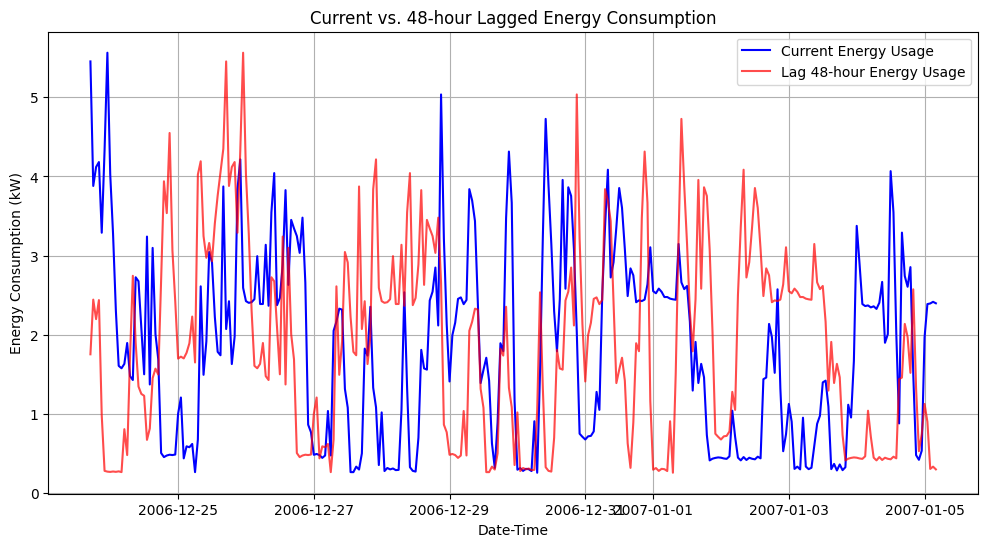

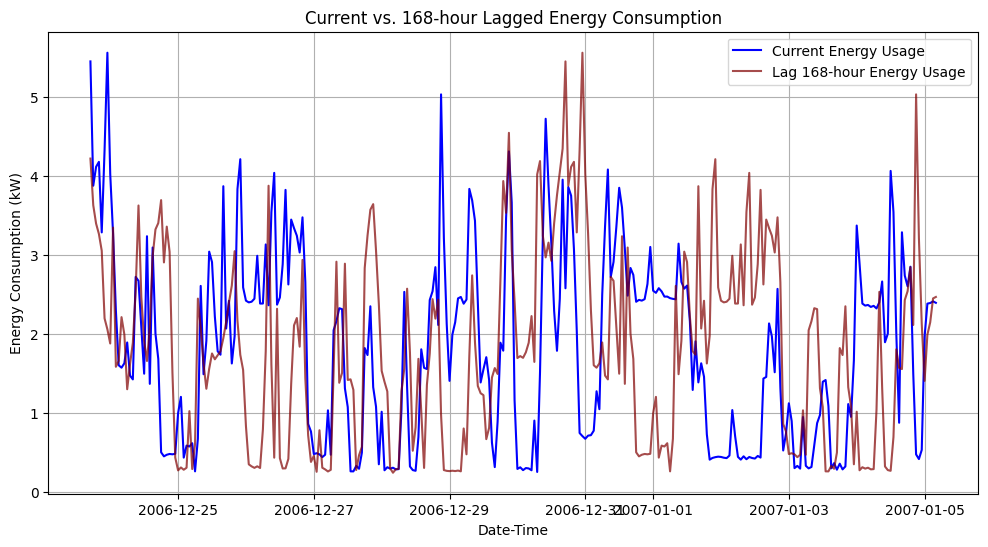

In [28]:
# Visualizing lag features
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_hourly.index[:300], df_hourly['Global_active_power'][:300], label='Current Energy Usage', color='blue')
plt.plot(df_hourly.index[:300], df_hourly['lag_24'][:300], label='Lag 24-hour Energy Usage', color='orange', alpha=0.7)
# plt.plot(df_hourly.index[:200], df_hourly['lag_48'][:200], label='Lag 48-hour Energy Usage', color='red', alpha=0.7)
# plt.plot(df_hourly.index[:200], df_hourly['lag_168'][:200], label='Lag 168-hour Energy Usage', color='maroon', alpha=0.7)
plt.title('Current vs. 24-hour Lagged Energy Consumption')
plt.xlabel('Date-Time')
plt.ylabel('Energy Consumption (kW)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df_hourly.index[:300], df_hourly['Global_active_power'][:300], label='Current Energy Usage', color='blue')
plt.plot(df_hourly.index[:300], df_hourly['lag_48'][:300], label='Lag 48-hour Energy Usage', color='red', alpha=0.7)

plt.title('Current vs. 48-hour Lagged Energy Consumption')
plt.xlabel('Date-Time')
plt.ylabel('Energy Consumption (kW)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df_hourly.index[:300], df_hourly['Global_active_power'][:300], label='Current Energy Usage', color='blue')
plt.plot(df_hourly.index[:300], df_hourly['lag_168'][:300], label='Lag 168-hour Energy Usage', color='maroon', alpha=0.7)

plt.title('Current vs. 168-hour Lagged Energy Consumption')
plt.xlabel('Date-Time')
plt.ylabel('Energy Consumption (kW)')
plt.legend()
plt.grid(True)
plt.show()

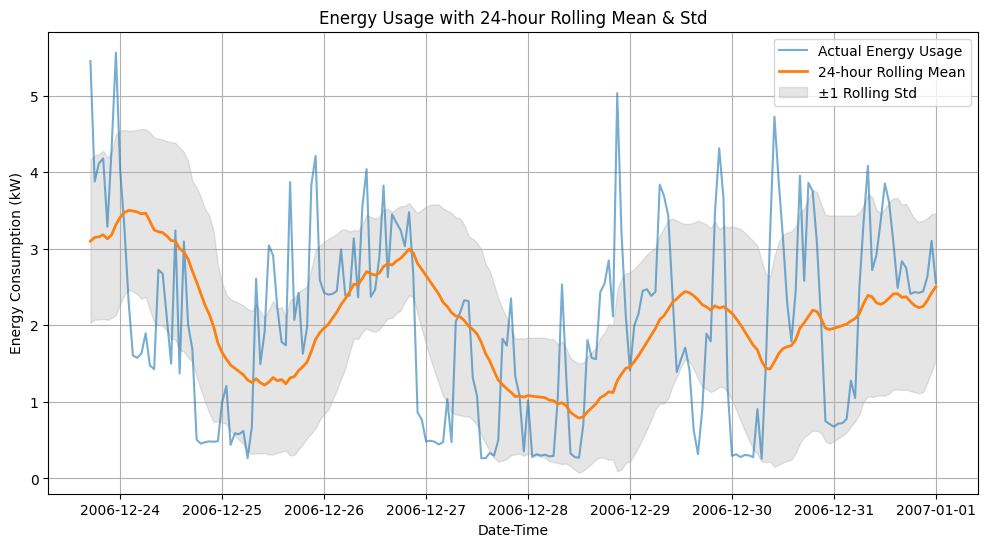

In [18]:
# Visualizing rolling window features

plt.figure(figsize=(12,6))
plt.plot(df_hourly.index[:200], df_hourly['Global_active_power'][:200], label='Actual Energy Usage', alpha=0.6)
plt.plot(df_hourly.index[:200], df_hourly['rolling_mean_24hr'][:200], label='24-hour Rolling Mean', linewidth=2)
plt.fill_between(df_hourly.index[:200], 
                 df_hourly['rolling_mean_24hr'][:200] - df_hourly['rolling_std_24hr'][:200],
                 df_hourly['rolling_mean_24hr'][:200] + df_hourly['rolling_std_24hr'][:200],
                 color='gray', alpha=0.2, label='±1 Rolling Std')

plt.title('Energy Usage with 24-hour Rolling Mean & Std')
plt.xlabel('Date-Time')
plt.ylabel('Energy Consumption (kW)')
plt.legend()
plt.grid(True)
plt.show()

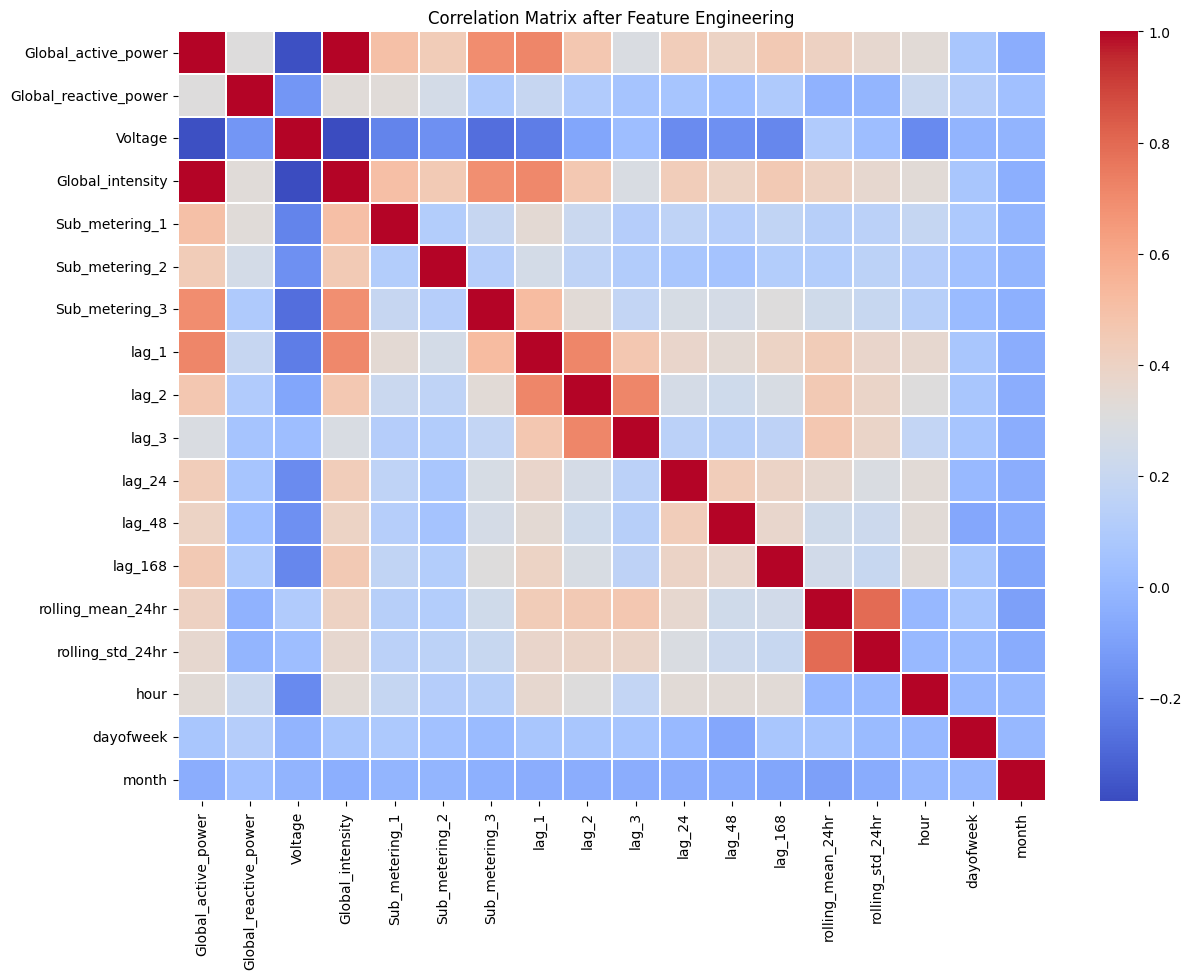

In [19]:
# Feature correlation (Final check)
plt.figure(figsize=(14, 10))
sns.heatmap(df_hourly.corr(), annot=False, cmap='coolwarm', linewidths=0.1)
plt.title('Correlation Matrix after Feature Engineering')
plt.show()

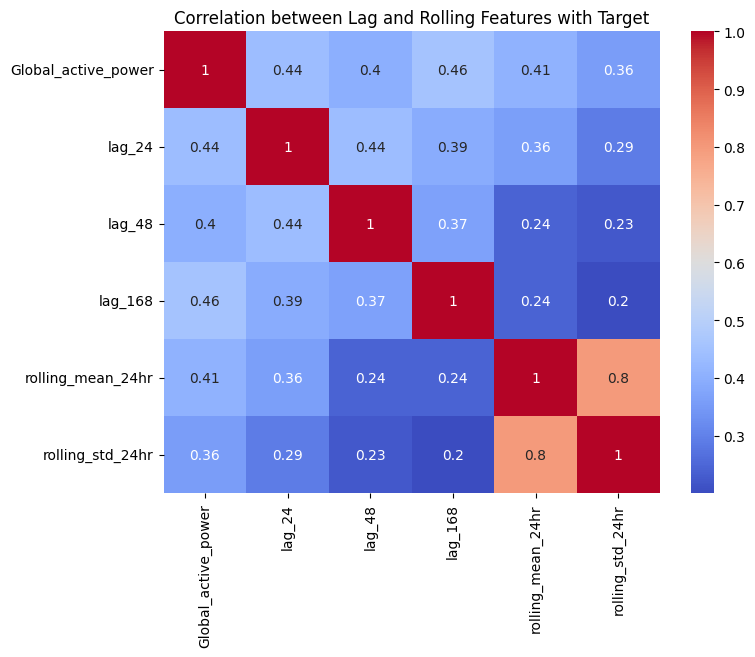

In [22]:
corr_df = df_hourly[['Global_active_power', 'lag_24', 'lag_48', 'lag_168', 'rolling_mean_24hr', 'rolling_std_24hr']]
corr_matrix = corr_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Lag and Rolling Features with Target')
plt.show()

In [29]:
df_hourly.to_csv('../data/processed/uci_energy_hourly.csv')